# Survival Analysis :  Quick Implementation

In [3]:
#install import stuff, you need to login and give google permissions twice
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!pip install pandas==0.22
!pip install lifelines

E: Package 'python-software-properties' has no installation candidate


KeyboardInterrupt: ignored

In [9]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
#mount google drive
%cd
!mkdir -p drive
!google-drive-ocamlfuse drive

/root
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [16]:
#navigating your google drive and saving files inside.
%cd
%ls
%cd drive/
%mkdir github_fromXA
%cd github_fromXA
%mkdir Survival-Analysis-Lifelines
#download model parameters
%ls -lh */
%ls -lh
%cd Survival-Analysis-Lifelines
!wget https://www.dropbox.com/s/bglmurk3bs07nh6/WA_Fn-UseC_-Telco-Customer-Churn.xlsx?dl=0 -O  WA_Fn-UseC_-Telco-Customer-Churn.xlsx
%ls -lh


/root
drive/
/root/drive
mkdir: cannot create directory ‘github_fromXA’: File exists
/root/drive/github_fromXA
mkdir: cannot create directory ‘Survival-Analysis-Lifelines’: File exists
total 743K
-rw-r--r-- 1 root root 743K Oct 11 07:07 'WA_Fn-UseC_-Telco-Customer-Churn.xlsx?dl=0'
total 4.0K
drwxr-xr-x 2 root root 4.0K Oct 11 07:07 Survival-Analysis-Lifelines/
/root/drive/github_fromXA/Survival-Analysis-Lifelines
--2019-10-11 07:08:22--  https://www.dropbox.com/s/bglmurk3bs07nh6/WA_Fn-UseC_-Telco-Customer-Churn.xlsx?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/bglmurk3bs07nh6/WA_Fn-UseC_-Telco-Customer-Churn.xlsx [following]
--2019-10-11 07:08:22--  https://www.dropbox.com/s/raw/bglmurk3bs07nh6/WA_Fn-UseC_-Telco-Customer-Churn.xlsx
Reusing existing connection to www.dropbox.com:443.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns',60)
pd.set_option('display.max_rows', 100)
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


/home/leexiongan/anaconda3/envs/python3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### We will be using Telco Customer Churn data from IBM Watson Analytics
https://www.ibm.com/communities/analytics/watson-analytics-blog/Telco-Customer-Churn/

In [3]:
##  create a dataframe
df = pd.read_excel("./WA_Fn-UseC_-Telco-Customer-Churn.xlsx") 

In [5]:
'''data description

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, 
online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, 
paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

'''

'data description\n\nCustomers who left within the last month – the column is called Churn\n\nServices that each customer has signed up for – phone, multiple lines, internet, \nonline security, online backup, device protection, tech support, and streaming TV and movies\n\nCustomer account information – how long they’ve been a customer, contract, payment method, \npaperless billing, monthly charges, and total charges\n\nDemographic info about customers – gender, age range, and if they have partners and dependents\n\n'

In [6]:
## Have a first look at the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#get all columns
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#view churn column , row 2 - 17 #python index starts from 0
df['Churn'].iloc[1:17]

1      No
2     Yes
3      No
4     Yes
5     Yes
6      No
7      No
8     Yes
9      No
10     No
11     No
12     No
13    Yes
14     No
15     No
16     No
Name: Churn, dtype: object

In [9]:
#total number of customers
len(df)

7043

In [10]:
#percentage of churn customers
np.mean(df['Churn']=='Yes')

0.2653698707936959

In [11]:
# unique entries of tech support
pd.unique(df['TechSupport'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [12]:
# access churn column from those who are on Tech support
df[df['TechSupport']=='Yes']['Churn']

3        No
8       Yes
14       No
15       No
18      Yes
       ... 
7027     No
7028     No
7036     No
7038     No
7042     No
Name: Churn, Length: 2044, dtype: object

In [13]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=(df['Churn']=='Yes')*1

type of contract: Month-to-month


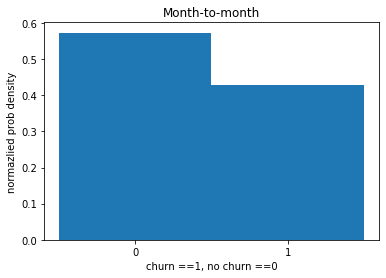

type of contract: One year


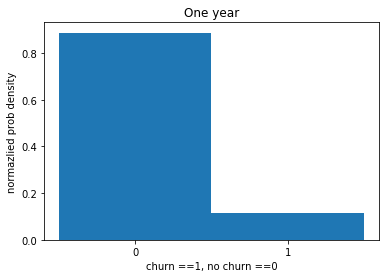

type of contract: Two year


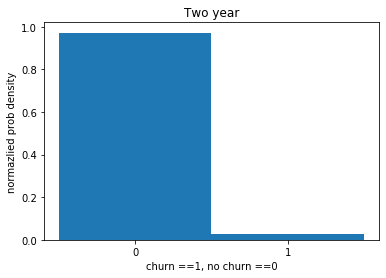

In [14]:

for i in pd.unique(df['Contract']):
    print ('type of contract:',i)
    plt.hist(df[df['Contract']==i]['Churn'],density=True,bins=(0,1,2))
    plt.xticks([0.5,1.5],labels=[0,1])
    plt.xlabel('churn ==1, no churn ==0')
    plt.ylabel('normazlied prob density')
    plt.title(i)
    plt.show()

In [15]:
#checking column for missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(3), obj

In [16]:
#customers with missing values, fill in with median
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [17]:
## Impute the null value with the median value
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [18]:
#get summary statistics for each col
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [19]:
## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [20]:
## lets have a look at the categories and their distribution in all the categorical columns.

for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------------------------
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------------------------
Column Name:  OnlineBackup
No                     3088
Yes     

In [21]:
print ('all variables:',df.keys())
variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

all variables: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [22]:
df_processed = pd.get_dummies(df[variables])
#get summary statistics for each col
df_processed.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,0.096834,0.903166,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2265.270398,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,0.295752,0.295752,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118

train,test roc: 0.7930680498149498 0.7755018579306012


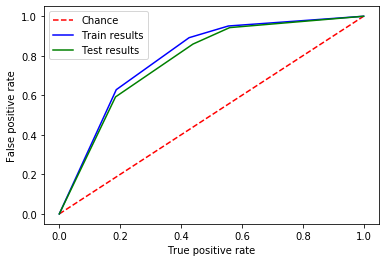

In [23]:
from sklearn import tree
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = pd.get_dummies(df_processed,drop_first=False)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(     
                            X, y, test_size=0.2, random_state=2)


clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy',min_samples_leaf=25)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict_proba(X_test)[:,1]
y_train_pred = clf.predict_proba(X_train)[:,1]
print ('train,test roc:',metrics.roc_auc_score(y_train,y_train_pred),metrics.roc_auc_score(y_test,y_test_pred))
fpr, tpr, thresholds  = metrics.roc_curve(y_train,y_train_pred)
plt.plot([0,1],[0,1],'r--',label='Chance')
plt.plot(fpr,tpr,'b',label='Train results')
fpr, tpr, thresholds  = metrics.roc_curve(y_test,y_test_pred)
plt.plot(fpr,tpr,'g',label='Test results')

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

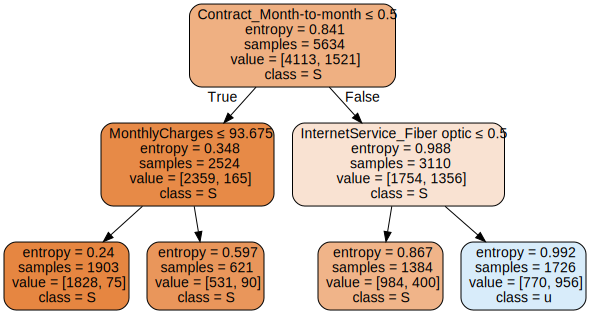

In [26]:
import graphviz 
import pydot

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn",format='png') 
graph

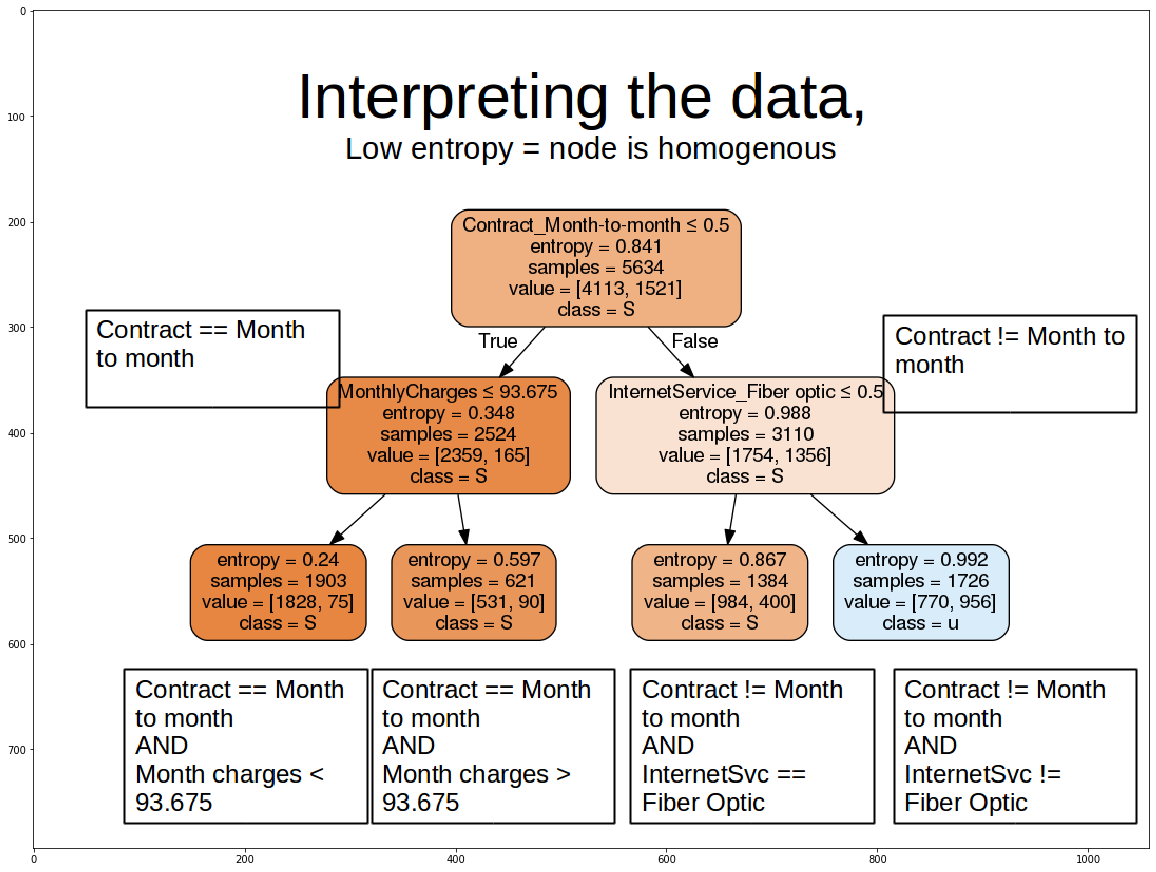

In [25]:
fig,ax = plt.subplots(1,1,figsize=(20,20))

plt.imshow(plt.imread('./Explain.png'))
plt.show()

train,test roc: 0.8540171771389861 0.8307766474915229


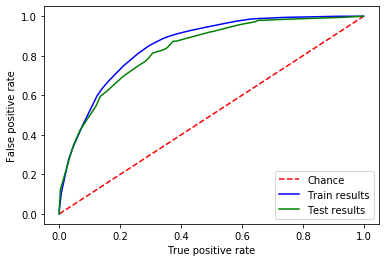

In [32]:
#making a more complicated model
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_leaf=25)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict_proba(X_test)[:,1]
y_train_pred = clf.predict_proba(X_train)[:,1]
print ('train,test roc:',metrics.roc_auc_score(y_train,y_train_pred),metrics.roc_auc_score(y_test,y_test_pred))
fpr, tpr, thresholds  = metrics.roc_curve(y_train,y_train_pred)
plt.plot([0,1],[0,1],'r--',label='Chance')
plt.plot(fpr,tpr,'b',label='Train results')
fpr, tpr, thresholds  = metrics.roc_curve(y_test,y_test_pred)
plt.plot(fpr,tpr,'g',label='Test results')

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

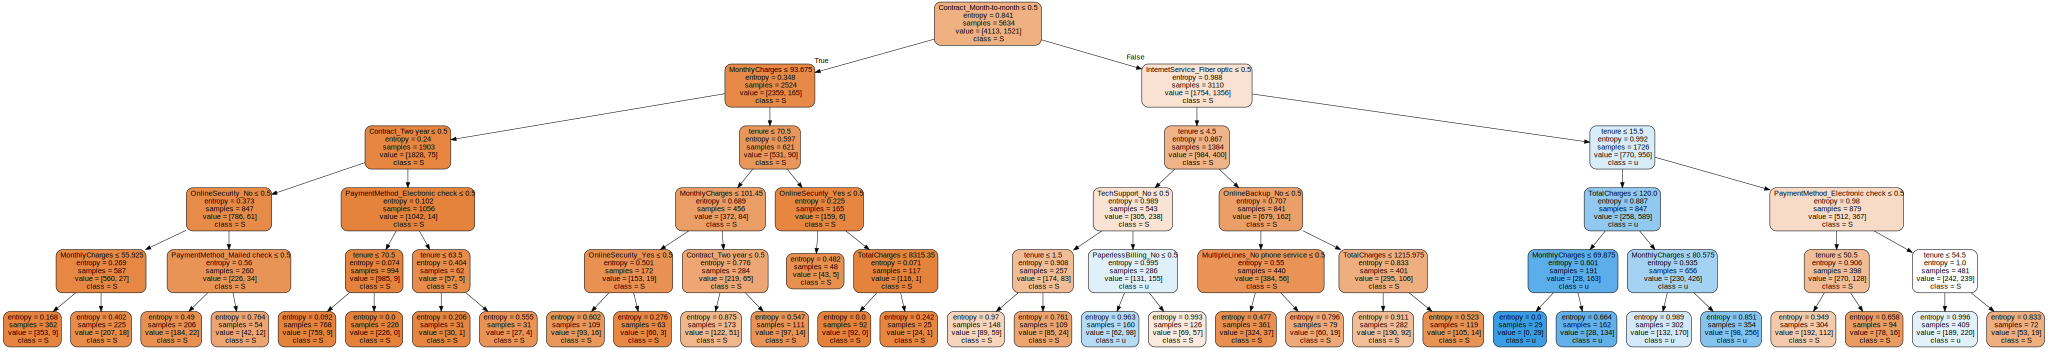

In [33]:
import graphviz 
import pydot

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn",format='png') 
graph

# Stradegies to reduce churn

In [41]:
df[df.tenure < 4.5].groupby(['Contract','InternetService','TechSupport'])['Churn'].apply(np.mean)

Contract        InternetService  TechSupport        
Month-to-month  DSL              No                     0.548571
                                 Yes                    0.380282
                Fiber optic      No                     0.767932
                                 Yes                    0.638889
                No               No internet service    0.274131
One year        DSL              No                     0.000000
                                 Yes                    0.000000
                Fiber optic      Yes                    1.000000
                No               No internet service    0.083333
Two year        DSL              No                     0.000000
                                 Yes                    0.000000
                No               No internet service    0.000000
Name: Churn, dtype: float64

In [42]:
df[df.tenure < 15.5].groupby(['Contract','InternetService'])['Churn'].apply(np.mean)

Contract        InternetService
Month-to-month  DSL                0.409987
                Fiber optic        0.692085
                No                 0.221687
One year        DSL                0.137931
                Fiber optic        0.272727
                No                 0.040816
Two year        DSL                0.000000
                No                 0.000000
Name: Churn, dtype: float64

In [53]:
df['AvgCharges'] = np.round((df['TotalCharges']/(1+df['tenure'])),-1)
df = df[df['AvgCharges']<1000]


/home/leexiongan/anaconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([1640.,  396.,  528.,  569.,  636.,  713.,  803.,  714.,  650.,
         383.]),
 array([ 10.,  21.,  32.,  43.,  54.,  65.,  76.,  87.,  98., 109., 120.]),
 <a list of 10 Patch objects>)

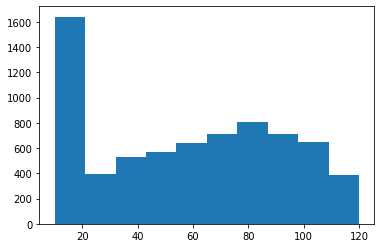

In [54]:
plt.hist(df['AvgCharges'])

In [72]:
df['tenure<15.5'] = df.tenure<15.5
df.groupby(['tenure<15.5','Contract','InternetService'])['Churn'].apply(np.mean)
#df[df.tenure < 15.5].groupby(['Contract','InternetService','AvgCharges'])['Churn'].apply(np.std)

tenure<15.5  Contract        InternetService
False        Month-to-month  DSL                0.177489
                             Fiber optic        0.407509
                             No                 0.064220
             One year        DSL                0.087891
                             Fiber optic        0.191288
                             No                 0.018797
             Two year        DSL                0.019934
                             Fiber optic        0.072261
                             No                 0.008726
True         Month-to-month  DSL                0.409987
                             Fiber optic        0.692085
                             No                 0.221687
             One year        DSL                0.137931
                             Fiber optic        0.272727
                             No                 0.041237
             Two year        DSL                0.000000
                             No            

In [106]:
df.groupby(['InternetService','StreamingMovies','Contract'])['MonthlyCharges'].apply(np.median)
#df[df.tenure < 15.5].groupby(['Contract','InternetService','AvgCharges'])['Churn'].apply(np.std)

InternetService  StreamingMovies      Contract      
DSL              No                   Month-to-month     49.450
                                      One year           56.100
                                      Two year           61.150
                 Yes                  Month-to-month     59.200
                                      One year           70.950
                                      Two year           80.275
Fiber optic      No                   Month-to-month     78.950
                                      One year           89.500
                                      Two year           92.450
                 Yes                  Month-to-month     95.400
                                      One year          103.450
                                      Two year          108.950
No               No internet service  Month-to-month     20.050
                                      One year           20.100
                                      Two year     

4.9627580207959205 4.775242990430864


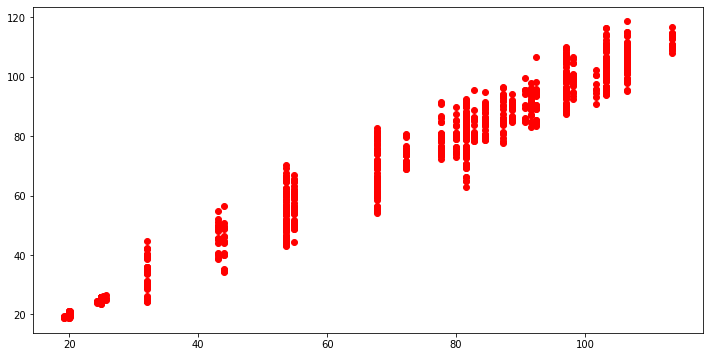

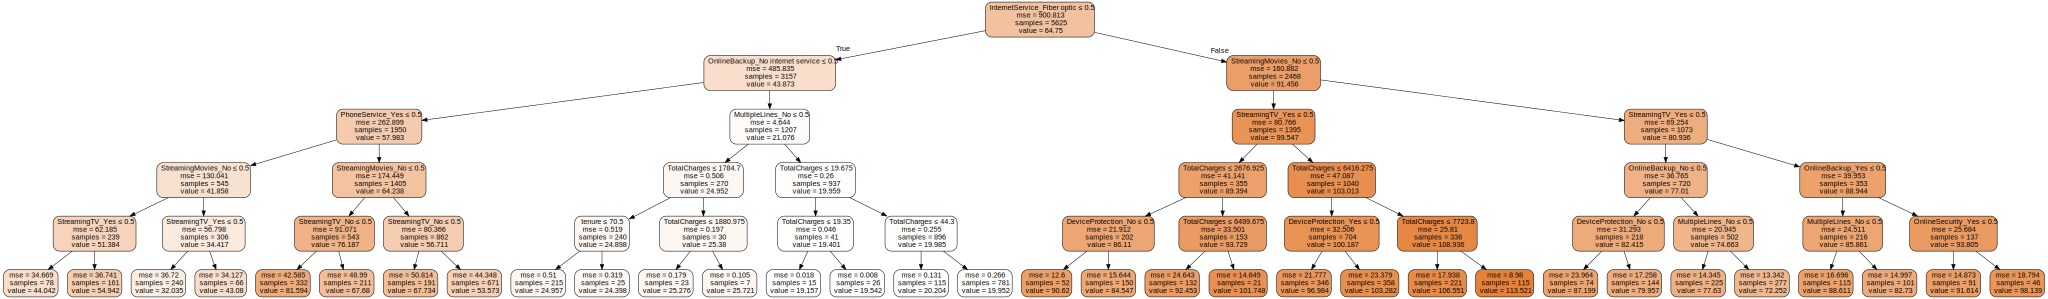

In [99]:
#making a more complicated model]
variables = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges','Churn']
df_processed = df[variables]
X = pd.get_dummies(df_processed,drop_first=False)
y = df[ 'MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(     
                            X, y, test_size=0.2, random_state=2)
clf = tree.DecisionTreeRegressor(max_depth=5,criterion='mse',min_samples_leaf=5)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
def mse(x,y):
    return np.mean((y-x)**2)**.5
print (mse(y_test_pred,y_test),mse(y_train_pred,y_train))
plt.plot(y_test_pred,y_test,'ro');plt.show()
import graphviz 
import pydot

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="MonthlyCharge",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("MonthlyCharge",format='png') 
graph